In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date
from scipy.optimize import minimize, Bounds

symbols  = [ 'SPY', "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           'REM', "VNQ", "RWX", # re
           'TIP', "IEF", "TLT", "BWX", #fi
           'DBC', "GLD", #como
           'twtr', 'intc', 'tsm',"VWUSX", "Amc"]

all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2022-01-01', 
                      end= date.today(),
                      interval = "1d",
                      threads = True,
                      progress=False)['Adj Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols

In [4]:
returns = np.log(all_stocks/all_stocks.shift(1))
returns.fillna(0)
returns = returns.iloc[1: , :]
returns

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2022-01-03 00:00:00,0.005773,0.009581,0.009480,0.004641,0.001045,0.007139,0.019513,-0.007875,0.001123,-0.005744,-0.009348,-0.026601,-0.012100,0.003842,-0.015503,-0.013042,0.032665,0.068189,0.007354,-0.025318
2022-01-04 00:00:00,-0.000335,-0.013055,0.001306,0.002992,0.013043,-0.003461,0.003404,-0.001217,-0.001966,-0.003822,-0.000527,-0.004167,0.000000,0.011913,0.007340,-0.043355,-0.001316,0.035091,-0.022695,-0.039613
2022-01-05 00:00:00,-0.019389,-0.031203,-0.009029,-0.009961,-0.004575,-0.016451,-0.018003,-0.029036,-0.016726,-0.008160,-0.004224,-0.005443,-0.004306,-0.004273,-0.003012,-0.033606,0.013644,-0.048693,-0.041447,-0.113721
2022-01-06 00:00:00,-0.000940,-0.000703,-0.003664,-0.007709,-0.007424,0.004551,0.003167,0.000895,-0.003436,-0.004343,-0.002472,0.002586,-0.001800,0.008527,-0.012320,0.002276,0.002595,0.011036,-0.003751,-0.012829
2022-01-07 00:00:00,-0.003961,-0.010892,0.004979,-0.000968,-0.006429,0.009041,0.005161,-0.006643,-0.002010,-0.001188,-0.003277,-0.007214,0.002518,0.001885,0.004541,0.002019,-0.010610,-0.039454,-0.011998,0.023323
2022-01-10 00:00:00,-0.001245,0.000658,-0.013680,-0.013088,-0.002403,0.000000,-0.001145,-0.005781,-0.005187,0.001267,-0.000266,0.002457,0.001077,-0.004246,0.003036,0.007534,0.032585,0.012153,0.000496,-0.009176
2022-01-11 00:00:00,0.009067,0.014910,0.012364,0.012673,0.007788,0.022850,0.010254,0.001539,0.002309,0.006938,0.002393,0.006639,0.001793,0.019200,0.011992,0.017116,0.012599,0.032736,0.017691,0.000439
2022-01-12 00:00:00,0.002700,0.003958,0.009174,0.011558,0.014220,0.016457,0.000567,0.001175,0.004602,-0.006464,0.000177,-0.003839,0.008207,0.007854,0.002639,-0.010135,-0.003045,0.023413,0.000325,-0.003076
2022-01-13 00:00:00,-0.013874,-0.025334,-0.007420,-0.007690,-0.010052,-0.014260,-0.004826,-0.001990,-0.004602,0.000237,0.003181,0.008841,0.002839,-0.010641,-0.003403,-0.039270,-0.014456,0.051297,-0.037372,-0.095046
2022-01-14 00:00:00,0.000409,0.006203,-0.002778,-0.004698,-0.001189,-0.000399,-0.003421,-0.009093,0.000576,-0.004517,-0.006905,-0.015225,-0.004973,0.012939,-0.002884,-0.006741,0.013739,0.010506,0.001515,-0.004366


In [13]:
lamb = 0.00005 #Faire attention car sinon il n'y a pas de mouvements de position
alpha = 1000000
Money = 1000
p=[0]*len(symbols)
Pos=[]

In [14]:
def objective_corr(pos):
    Pos.append(pos)
    pos = np.array(pos)
    s = abs(pos@np.corrcoef(returns.iloc[1: , :].fillna(0).T)@pos) + TC(pos) - alpha*returns.mean()@pos
    
    
    if TC(pos)>0.001:
        print('\033[92m'+"Cout rajoutés de transaction: "+str(TC(pos))+'\033[0m')
    print('\033[93m'+"Cout de mean: " + str(alpha*returns.mean()@pos) + '\033[0m')
    #print(f"Les valeurs  du vecteur poids sont:{pos.round(3)}")
    print(f"Les valeurs de la fonction objective:{s.round(3)}")
    return s

In [15]:
def TC(pos):
    if len(Pos)>1:
        return lamb*(all_stocks[-1::].values[0]@np.abs(np.array(pos)-np.array(p)))
    else: 
        return lamb*(all_stocks[-1::].values[0]@np.abs(np.array(pos)))

In [16]:
def new_pf(p,lamb = lamb,alpha = alpha, Money=Money):
    cons = ({"type":"eq", "fun": lambda x: all_stocks[-1::].values[0]@np.array(x).T - Money}, 
        # The positions must invest no more than the initial money.
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1}) 
 
 
    #Every stock can get any position from 0 to Money
    bounds = Bounds(0, Money)
    
    pos_new = minimize(objective_corr, p, 
             method = "SLSQP", 
             bounds=bounds, 
             constraints= cons)
    return(pos_new)

In [17]:
pof=new_pf(p,lamb = lamb,alpha = alpha, Money=Money)
pof

Cout de mean: 0.0
Les valeurs de la fonction objective:0.0
Cout de mean: -4.276456431297516e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -6.930851553792198e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -2.9311136400515646e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -3.761181697743103e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -2.514368844578459e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -7.207290185980725e-06
Les valeurs de la fonction objective:0.0
Cout de mean: -3.804420122806567e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -5.630052952024654e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -2.6012598647244492e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -1.4228466817074464e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -1.3858927355887165e-05
Les valeurs de la fonction objective:0.0
Cout de mean: -2.792213473650109e-05
Les valeurs de la fonction objective:0.0
C

     fun: -148173.1941424465
     jac: array([ 2865.34765625,  4647.99609375,  1960.68359375,  2519.80273438,
        1692.44726562,   482.48046875,  2545.50390625,  3782.48242188,
        1742.91210938,   975.20898438,   944.45898438,  1888.56054688,
         951.71679688, -3441.63867188, -1037.953125  ,  7765.79882812,
        3827.56640625,   806.07226562,  6424.01757812, 14326.15234375])
 message: 'Positive directional derivative for linesearch'
    nfev: 42
     nit: 6
    njev: 2
  status: 8
 success: False
       x: array([0.00000000e+00, 4.61939140e-05, 9.05441134e-05, 1.29465289e-04,
       7.00797924e-05, 0.00000000e+00, 1.63297954e-04, 1.92465879e-04,
       1.00988821e-04, 0.00000000e+00, 0.00000000e+00, 1.64863905e-05,
       4.63048340e-05, 4.25348051e+01, 0.00000000e+00, 5.53432022e-04,
       2.47760367e-04, 0.00000000e+00, 4.35731361e-04, 1.06070458e-03])

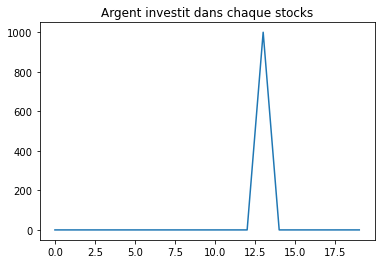

L'argent est le plus investit dans l'action: DBC


In [18]:
plt.plot([pof.x[i] * all_stocks[-1::].values[0][i] for i in range(len(pof.x))])
plt.title("Argent investit dans chaque stocks")
plt.show()
print("L'argent est le plus investit dans l'action: "+symbols[np.argmax([pof.x[i] * all_stocks[-1::].values[0][i] for i in range(len(pof.x))])])